In [6]:
## Add parent directory to system path so we can add modules from there
# https://stackoverflow.com/questions/714063/importing-modules-from-parent-folder#11158224
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [7]:
## Auto reload changed modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
import matplotlib.pyplot as plt
import numpy as np
import time

from evaluation import reading, evaluation

In [9]:
def is_negative(head, tail, cluster, all_pairs):
    if (head, tail) in all_pairs:
        return False
    else:
        return cluster[head] != cluster[tail]

In [29]:
transe_fb15k_data = reading.read_dataset('fb15k', 'transe')

In [16]:
fb15k_data = reading.read_dataset('fb15k')
wn_data = reading.read_dataset('wn')

In [34]:
fb15k = evaluation.Evaluation(*fb15k_data, is_negative=is_negative)
wn = evaluation.Evaluation(*wn_data, is_negative=is_negative)
transe_fb15k = evaluation.Evaluation(*transe_fb15k_data, is_negative=is_negative)

In [36]:
fb15k.hits_n(10), wn.hits_n(10), transe_fb15k.hits_n(10)

(0.5233447884748862, 0.8079, 0.6259924497638435)

In [41]:
thresholds = np.arange(0, 0.1, 0.01)
precision_fb = []
precision_wn = []
precision_transe = []
for t in thresholds:
    precision_fb.append(fb15k.hits_threshold(t))
    precision_wn.append(wn.hits_threshold(t))

    precision_transe.append(transe_fb15k.hits_threshold(t*10))    

(array([0., 1.]), array([ 15577, 102565]))
(array([0., 1.]), array([ 467, 9533]))
(array([0., 1.]), array([47188, 70954]))
(array([0., 1.]), array([1536, 8464]))
(array([0., 1.]), array([57230, 60912]))
(array([0., 1.]), array([2006, 7994]))
(array([0., 1.]), array([63882, 54260]))
(array([0., 1.]), array([2418, 7582]))
(array([0., 1.]), array([68623, 49519]))
(array([0., 1.]), array([2716, 7284]))
(array([0., 1.]), array([72456, 45686]))
(array([0., 1.]), array([2976, 7024]))
(array([0., 1.]), array([75565, 42577]))
(array([0., 1.]), array([3226, 6774]))
(array([0., 1.]), array([78065, 40077]))
(array([0., 1.]), array([3481, 6519]))
(array([0., 1.]), array([80172, 37970]))
(array([0., 1.]), array([3680, 6320]))
(array([0., 1.]), array([82054, 36088]))
(array([0., 1.]), array([3887, 6113]))
(array([0., 1.]), array([ 10950, 107192]))
(array([0., 1.]), array([ 13535, 104607]))
(array([0., 1.]), array([ 16733, 101409]))
(array([0., 1.]), array([ 17391, 100751]))
(array([0., 1.]), array([1

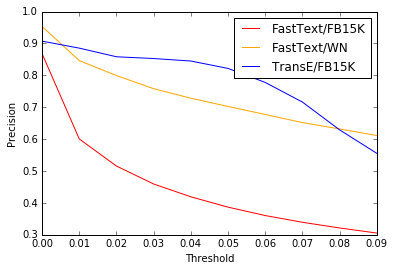

In [42]:
plt.plot(thresholds, precision_fb, color='red', label="FastText/FB15K")
plt.plot(thresholds, precision_wn, color='orange', label="FastText/WN")
plt.plot(thresholds, precision_transe, color='blue', label="TransE/FB15K")
plt.legend()
plt.xlabel("Threshold")
plt.ylabel("Precision")

In [45]:
precisions_fb = []
precisions_wn = []
precisions_transe = []
counts_fb = []
counts_wn = []
counts_transe = []
times = []

for t in thresholds:
    begin = time.clock()
    precision, count = fb15k.hits_neg_threshold(t)
    end = time.clock()
    precisions_fb.append(precision)
    counts_fb.append(count)
    times.append(end - begin)
    
    precision, count = wn.hits_neg_threshold(t)
    precisions_wn.append(precision)
    counts_wn.append(count)
    
    precision, count = transe_fb15k.hits_neg_threshold(t*10)
    precisions_transe.append(precision)
    counts_transe.append(count)

(array([0., 1.]), array([ 88070, 148214]))
(array([0., 1.]), array([10238,  9762]))
(array([0., 1.]), array([ 43200, 193084]))
(array([0., 1.]), array([ 47463, 188821]))
(array([0., 1.]), array([ 1620, 18380]))
(array([0., 1.]), array([ 45785, 190499]))
(array([0., 1.]), array([ 57444, 178840]))
(array([0., 1.]), array([ 2045, 17955]))
(array([0., 1.]), array([ 48983, 187301]))
(array([0., 1.]), array([ 64073, 172211]))
(array([0., 1.]), array([ 2442, 17558]))
(array([0., 1.]), array([ 49641, 186643]))
(array([0., 1.]), array([ 68797, 167487]))
(array([0., 1.]), array([ 2732, 17268]))
(array([0., 1.]), array([ 50563, 185721]))
(array([0., 1.]), array([ 72610, 163674]))
(array([0., 1.]), array([ 2984, 17016]))
(array([0., 1.]), array([ 53307, 182977]))
(array([0., 1.]), array([ 75702, 160582]))
(array([0., 1.]), array([ 3232, 16768]))
(array([0., 1.]), array([ 58497, 177787]))
(array([0., 1.]), array([ 78187, 158097]))
(array([0., 1.]), array([ 3485, 16515]))
(array([0., 1.]), array([ 6

In [13]:
np.mean(times)

5.375932700000004

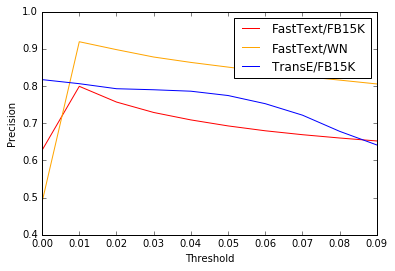

In [46]:
dims = 10
plt.plot(thresholds[:dims], precisions_fb[:dims], color='red', label="FastText/FB15K")
plt.plot(thresholds[:dims], precisions_wn[:dims], color='orange', label="FastText/WN")
plt.plot(thresholds[:dims], precisions_transe[:dims], color='blue', label="TransE/FB15K")
plt.xlabel("Threshold")
plt.ylabel("Precision")
plt.legend()

In [47]:
start = 1
plt.plot(thresholds[start:dims], np.min(counts_fb, axis=1)[start:dims], color='yellow', label="Minimum")
plt.plot(thresholds[start:dims], np.median(counts_fb, axis=1)[start:dims], color='orange', label="Median")
plt.plot(thresholds[start:dims], np.mean(counts_fb, axis=1)[start:dims], color='green', label="Mean")
plt.plot(thresholds[start:dims], np.max(counts_fb, axis=1)[start:dims], color='red', label="Maximum")
plt.legend()
plt.xlabel("Threshold")
plt.ylabel("Number of Predictions")

AxisError: axis 1 is out of bounds for array of dimension 1

In [58]:
precisions_fb = []
precisions_wn = []
precisions_transe = []
counts = []
times = []

for t in thresholds:
    begin = time.clock()
    precision, count = fb15k.hits_group(t)
    end = time.clock()
    precisions_fb.append(precision)
    counts.append(count)
    times.append(end - begin)
    
    precision, count = wn.hits_group(t)
    precisions_wn.append(precision)
    counts_wn.append(count)
    
    precision, count = transe_fb15k.hits_group(t*10)
    precisions_transe.append(precision)
    counts_transe.append(count)

(array([0., 1.]), array([1977249,  102565]))
(array([0., 1.]), array([473645,   9533]))
(array([0., 1.]), array([971277, 100187]))
(array([0., 1.]), array([48393, 70954]))
(array([0., 1.]), array([1663, 8464]))
(array([0., 1.]), array([972719,  98745]))
(array([0., 1.]), array([57784, 60912]))
(array([0., 1.]), array([2056, 7994]))
(array([0., 1.]), array([974837,  96627]))
(array([0., 1.]), array([64272, 54260]))
(array([0., 1.]), array([2444, 7582]))
(array([0., 1.]), array([975410,  96054]))
(array([0., 1.]), array([68934, 49519]))
(array([0., 1.]), array([2733, 7284]))
(array([0., 1.]), array([976467,  94997]))
(array([0., 1.]), array([72715, 45686]))
(array([0., 1.]), array([2984, 7024]))
(array([0., 1.]), array([979594,  91870]))
(array([0., 1.]), array([75787, 42577]))
(array([0., 1.]), array([3232, 6774]))
(array([0., 1.]), array([985279,  86180]))
(array([0., 1.]), array([78259, 40077]))
(array([0., 1.]), array([3485, 6519]))
(array([0., 1.]), array([992895,  78504]))
(array([

In [59]:
np.mean(times)

2.7074850999999853

In [60]:
np.max(precisions_fb)

0.5945185048639681

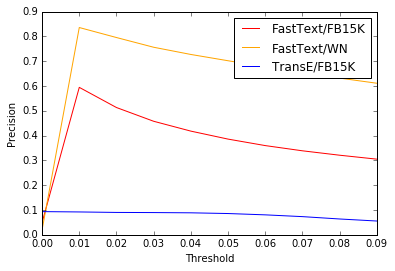

In [61]:
plt.plot(thresholds, precisions_fb, color='red', label="FastText/FB15K")
plt.plot(thresholds, precisions_wn, color='orange', label="FastText/WN")
plt.plot(thresholds, precisions_transe, color='blue', label="TransE/FB15K")
plt.xlabel("Threshold")
plt.ylabel("Precision")
plt.legend()

In [20]:
precision, counts = fb15k.hits_group(0.011, False)

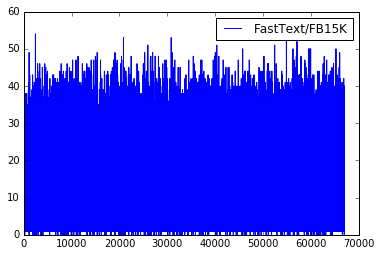

In [21]:
plt.plot(counts, label="FastText/FB15K")
plt.legend()

In [22]:
## Becnhmark with approx. maximum
iterations = 10
threshold = 0.0011

times_group = []
times_neg = []

for i in range(iterations):
    start = time.clock()
    fb15k.hits_group(threshold)
    end = time.clock()
    times_group.append(end - start)
    
    start = time.clock()
    fb15k.hits_neg_threshold(threshold)
    end = time.clock()
    times_neg.append(end - start)

print("Grouped:", np.mean(times_group), "Only Negatives:", np.mean(times_neg))

(array([0., 1.]), array([35560, 91704]))
(array([0., 1.]), array([ 27272, 209012]))
(array([0., 1.]), array([35560, 91704]))
(array([0., 1.]), array([ 27272, 209012]))
(array([0., 1.]), array([35560, 91704]))
(array([0., 1.]), array([ 27272, 209012]))
(array([0., 1.]), array([35560, 91704]))
(array([0., 1.]), array([ 27272, 209012]))
(array([0., 1.]), array([35560, 91704]))
(array([0., 1.]), array([ 27272, 209012]))
(array([0., 1.]), array([35560, 91704]))
(array([0., 1.]), array([ 27272, 209012]))
(array([0., 1.]), array([35560, 91704]))
(array([0., 1.]), array([ 27272, 209012]))
(array([0., 1.]), array([35560, 91704]))
(array([0., 1.]), array([ 27272, 209012]))
(array([0., 1.]), array([35560, 91704]))
(array([0., 1.]), array([ 27272, 209012]))
(array([0., 1.]), array([35560, 91704]))
(array([0., 1.]), array([ 27272, 209012]))
Grouped: 1.909201600000003 Only Negatives: 13.284699099999997


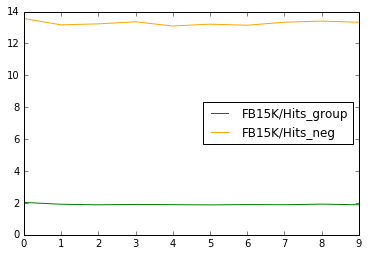

In [30]:
plt.plot(times_group, color='green', label="FB15K/Hits_group")
plt.plot(times_neg, color='orange', label="FB15K/Hits_neg")
plt.legend(loc='right')
plt.show()

In [24]:
# TODO:
# Select negative samples from graph.
# Approaches:
# 1. Cluster the graph and select nodes pairs from to very different clusters – these should not appear in the data
# 2. Find nodes that never have an edge of some type

In [25]:
# Average probability among top 10
top_n = 10
top_prob = fb15k_data[1][:, :top_n]
np.median(top_prob), np.mean(top_prob), np.max(top_prob), np.min(top_prob)

(0.0241295, 0.07042871778164919, 1.00001, 1e-05)

In [26]:
fb15k_data[1].shape[1]

300

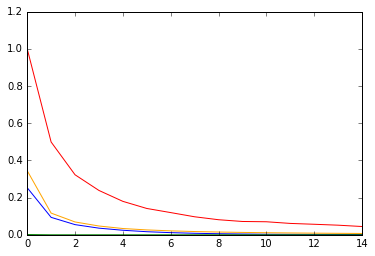

In [27]:
dims = 15
plt.plot(np.arange(dims), np.median(fb15k_data[1], axis=0)[:dims], color='blue')
plt.plot(np.arange(dims), np.mean(fb15k_data[1], axis=0)[:dims], color='orange')
plt.plot(np.arange(dims), np.max(fb15k_data[1], axis=0)[:dims], color='red')
plt.plot(np.arange(dims), np.min(fb15k_data[1], axis=0)[:dims], color='green')
plt.show()

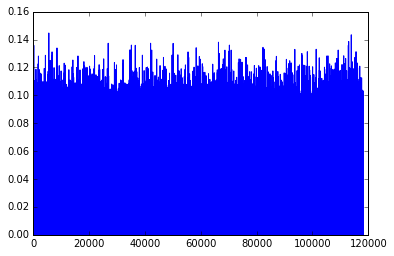

In [28]:
x = np.arange(len(top_prob))
plt.plot(x, np.median(top_prob, axis=1), color='blue')
#plt.plot(x, np.mean(top_prob, axis=1), color='orange')
#plt.plot(x, np.max(top_prob, axis=1), color='red')
#plt.plot(x, np.min(top_prob, axis=1), color='green')
plt.show()